In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-football-data/Football_Correllation_Cleaned.csv


In [2]:
import pandas as pd
file_path = "/kaggle/input/cleaned-football-data/Football_Correllation_Cleaned.csv"

# Load the dataset
df = pd.read_csv(file_path, encoding="ISO-8859-1")

df = df.dropna(axis=1, how='all')

df.head()

df = df.dropna(how="all")

df = df.reset_index(drop=True)

df = df.iloc[:96]

print(f"Final dataset rows: {df.shape[0]}")


Final dataset rows: 96


In [3]:
from sklearn.model_selection import train_test_split

# Define target variable (dependent variable)
y = df['PPG2']  # Change if predicting another variable

# Define features (independent variables)
X = df[['Win', 'Draw', 'Loss', 'GF', 'GA', 'GD',
       'Average Attendence', 'Transfer Budget (miilion)',
       'City Pop.(thousands)', 'Age']]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


print(f"X_train rows: {X_train.shape[0]}")
print(f"X_test rows: {X_test.shape[0]}")

X_train rows: 76
X_test rows: 20


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-Squared Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared Score: {r2:.4f}")


Mean Squared Error: 0.0048
R-Squared Score: 0.9726


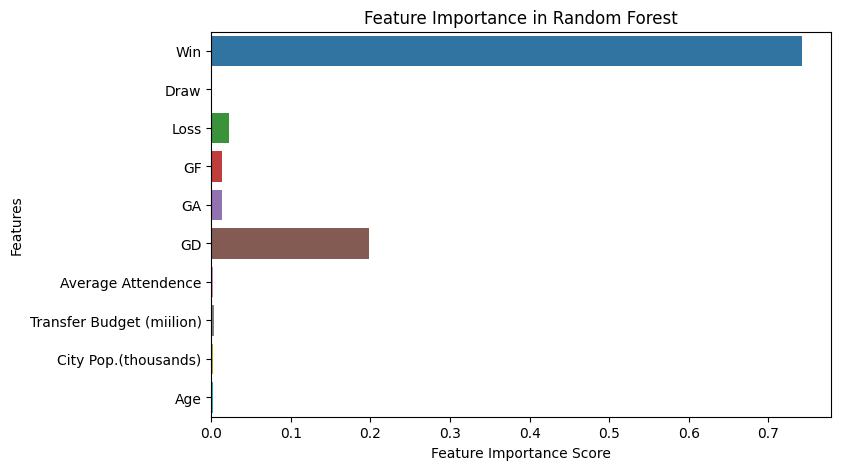

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()


In [7]:
# Define new feature set without 'Win', 'Draw', 'Loss'
X_new = df[[ 'Average Attendence', 'Transfer Budget (miilion)', 'City Pop.(thousands)', 'Age']]

# Keep the same target variable
y_new = df['PPG2']

# Split into training and test sets again
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train new model
rf_model_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = rf_model_new.predict(X_test_new)


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"New Mean Squared Error: {mse_new:.4f}")
print(f"New R-Squared Score: {r2_new:.4f}")


New Mean Squared Error: 0.1092
New R-Squared Score: 0.6031


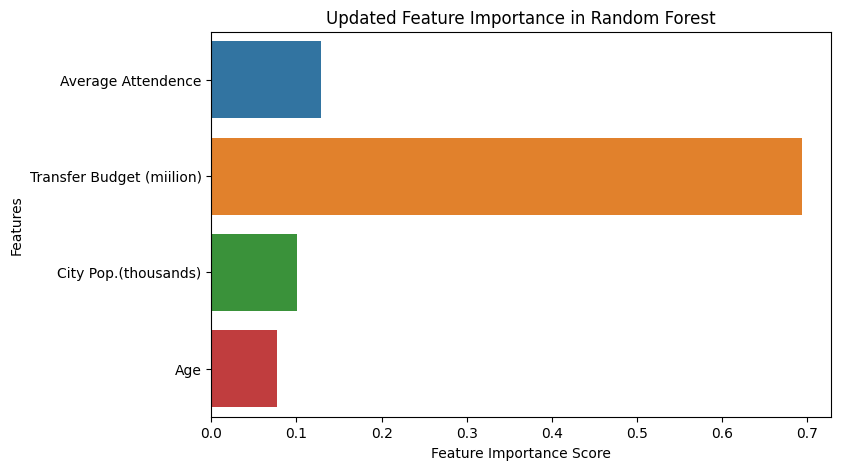

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


feature_importance_new = rf_model_new.feature_importances_
features_new = X_new.columns

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance_new, y=features_new)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Updated Feature Importance in Random Forest')
plt.show()
